In [ ]:
import pandas as pd
import numpy as np
import datetime
import json

## Импорт датасетов

1. предпенсионный возраст

In [ ]:
data_silver = pd.read_csv("resume_silver_.csv")
data_silver.head()

birth_date  ... age
0    1 декабря 1960  ...  60
1     1 ноября 1950  ...  70
2       2 июля 1953  ...  68
3     15 марта 1959  ...  62
4  25 December 1954  ...  66

[5 rows x 12 columns]

In [ ]:
data_silver = data_silver[['gender', 'title', 'specialization', 'skill_set', 'experience', 'age']]
data_silver.head()

gender  ... age
0  Женщина  ...  60
1  Женщина  ...  70
2  Мужчина  ...  68
3  Женщина  ...  62
4   Female  ...  66

[5 rows x 6 columns]

In [ ]:
data_silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          43 non-null     object
 1   title           43 non-null     object
 2   specialization  43 non-null     object
 3   skill_set       43 non-null     object
 4   experience      43 non-null     object
 5   age             43 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ KB


2. пенсионный возраст

In [ ]:
data_pre_silver = pd.read_csv("resume_pre_silver_.csv")
data_pre_silver = data_pre_silver[['gender', 'title', 'specialization', 'skill_set', 'experience', 'age']]
data_pre_silver.head()

gender  ... age
0  Мужчина  ...  61
1  Мужчина  ...  62
2  Женщина  ...  57
3  Женщина  ...  55
4  Женщина  ...  55

[5 rows x 6 columns]

In [ ]:
data_pre_silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          68 non-null     object
 1   title           68 non-null     object
 2   specialization  68 non-null     object
 3   skill_set       68 non-null     object
 4   experience      68 non-null     object
 5   age             68 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 3.3+ KB


3. другие возраста

In [ ]:
data_rest = pd.read_csv("resume_rest_.csv")
data_rest = data_rest[['gender', 'title', 'specialization', 'skill_set', 'experience', 'age']]
data_rest.head()

gender  ... age
0  Женщина  ...  42
1  Мужчина  ...  23
2  Женщина  ...  22
3  Женщина  ...  53
4  Мужчина  ...  30

[5 rows x 6 columns]

In [ ]:
data_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          1745 non-null   object
 1   title           1745 non-null   object
 2   specialization  1745 non-null   object
 3   skill_set       1745 non-null   object
 4   experience      1745 non-null   object
 5   age             1745 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 81.9+ KB


4. Вакансии

In [ ]:
data_vacancies = pd.read_csv("vacancies_data_.csv")
data_vacancies.head()

name  ...                created_at
0   Учитель\репетитор по математике 5-11 классов  ...  2021-09-05T14:01:26+0300
1                     Логопед (онлайн, удаленно)  ...  2021-09-24T08:45:08+0300
2                              Тренер по футболу  ...  2021-09-16T11:27:15+0300
3  Преподаватель русского языка и обществознания  ...  2021-09-20T11:14:11+0300
4      Преподаватель русского языка и литературы  ...  2021-09-10T12:42:16+0300

[5 rows x 8 columns]

In [ ]:
len(data_vacancies)

2000

# Предварительная обработка

## Датафрейм "Вакансии"

Создадим новый датасет, объединив все требования работодателей к навыкам по должностям.

In [ ]:
vacancie_counts = data_vacancies['name'].value_counts().rename_axis('name').reset_index(name='counts')
vacancie_counts.head()

name  counts
0      Преподаватель английского языка     169
1                          Воспитатель      70
2            Учитель начальных классов      65
3                     Педагог-психолог      39
4  Педагог дополнительного образования      33

In [ ]:
def proc_df(df):
    df = df[['key_skills', 'specializations']]
    return pd.Series(df.T.values.tolist(), df.columns)

new_vacancies = data_vacancies.groupby(['name']).apply(proc_df).reset_index()
new_vacancies.head()

name  ...                                    specializations
0         Assistant teacher / Помощник преподавателя  ...  [[['14.364', 'Языки', '14', 'Наука, образовани...
1                                     BIM-инструктор  ...  [[['20.527', 'Отопление, вентиляция и кондицио...
2    Cпециалист отделения учебно-методической работы  ...  [[['26.742', 'Другое', '26', 'Закупки'], ['14....
3                                    English Teacher  ...  [[['14.364', 'Языки', '14', 'Наука, образовани...
4  English Teacher (Immediate start, Mytischy / M...  ...  [[['14.60', 'Гуманитарные науки', '14', 'Наука...

[5 rows x 3 columns]

In [ ]:
new_vacancies = new_vacancies.merge(vacancie_counts, how='inner', on='name')
new_vacancies.head()

name  ... counts
0         Assistant teacher / Помощник преподавателя  ...      1
1                                     BIM-инструктор  ...      1
2    Cпециалист отделения учебно-методической работы  ...      1
3                                    English Teacher  ...      1
4  English Teacher (Immediate start, Mytischy / M...  ...      1

[5 rows x 4 columns]

Исправим записи о скилах:

In [ ]:
def extract_skills(key_skills):
    """
    Обработка строки.
    """
    total_skills = []
    for key_list in key_skills:
      if key_list != []:
        print(key_list)
        key_list = json.loads(key_list.replace('"', '').replace("'", '"'))
        for skill in key_list:
          total_skills.append(skill[0])
    return total_skills

def apply_extract_skills(df):
    """
    Создаем метод для обработки записей о ключевых умениях.
    """
    return df.apply(
        lambda row:
          extract_skills(row)
    )

In [ ]:
aaa = []
if aaa != []:
  print('yes')
else:
  print('no')

no


In [ ]:
new_vacancies1 = new_vacancies
new_vacancies1['key_skills'] = apply_extract_skills(new_vacancies1['key_skills'])
new_vacancies1.head()

[]
[['Autodesk Revit'], ['Проведение семинаров'], ['Обучение'], ['GetCourse'], ['Умение принимать решения']]
[['Государственные закупки'], ['Заключение договоров'], ['Закупки'], ['Организация учебного процесса']]
[['Английский язык']]
[]
[['Преподаватель'], ['Грамотная речь'], ['Организаторские навыки'], ['Английский язык'], ['Грамотность'], ['Работа в команде']]
[]
[['Английский язык'], ['Преподаватель']]
[['Преподаватель'], ['Английский язык'], ['Грамотная речь'], ['Организация учебного процесса'], ['Организация мероприятий']]
[]
[]
[['English'], ['Грамотная речь'], ['Английский язык'], ['Time management'], ['Writing Skills'], ['Ответственность и пунктуальность'], ['Знание компьютера']]
[['Английский язык'], ['Грамотная речь'], ['MS PowerPoint'], ['English'], ['Fluent English'], ['Навыки делового общения']]
[['Английский язык'], ['Internet'], ['Time management'], ['Communication skills'], ['Interpersonal skills']]
[['Английский язык'], ['Internet'], ['Time management'], ['Communicati

name  ... counts
0         Assistant teacher / Помощник преподавателя  ...      1
1                                     BIM-инструктор  ...      1
2    Cпециалист отделения учебно-методической работы  ...      1
3                                    English Teacher  ...      1
4  English Teacher (Immediate start, Mytischy / M...  ...      1

[5 rows x 4 columns]

Исправим записи о специализациях:

In [ ]:
def extract_specializations(specializations):
    """
    Обработка строки.
    """
    total_spec = []
    for spec_list in specializations:
      spec_list = json.loads(spec_list.replace("'", '"'))
      for spec in spec_list:
        total_spec.append(spec[1])
    return total_spec


def apply_extract_specializations(df):
    """
    Создаем метод для обработки записей о ключевых умениях.
    """
    return df.apply(
        lambda row:
          extract_specializations(row)
    )

In [ ]:
new_vacancies1['specializations'] = apply_extract_specializations(new_vacancies1['specializations'])
new_vacancies1.head()

name  ... counts
0         Assistant teacher / Помощник преподавателя  ...      1
1                                     BIM-инструктор  ...      1
2    Cпециалист отделения учебно-методической работы  ...      1
3                                    English Teacher  ...      1
4  English Teacher (Immediate start, Mytischy / M...  ...      1

[5 rows x 4 columns]

In [ ]:
data_vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             2000 non-null   object
 1   description      2000 non-null   object
 2   key_skills       2000 non-null   object
 3   specializations  2000 non-null   object
 4   experience.name  2000 non-null   object
 5   schedule.name    2000 non-null   object
 6   employment.name  2000 non-null   object
 7   created_at       2000 non-null   object
dtypes: object(8)
memory usage: 125.1+ KB


## Датафрейм "Резюме"

Исправим записи о специализациях:

In [ ]:
def resume_spec(specializations):
    total_spec = []
    specializations = json.loads(specializations.replace("'", '"'))
    for spec in specializations:
      total_spec.append(spec[0])
    return total_spec

def apply_resume_spec(df):
    """
    Создаем метод для применения функции resume_spec к каждому ряду датафрейма.
    """
    return df.apply(
        lambda row:
          resume_spec(row)
    )

In [ ]:
data_silver['specialization'] = apply_resume_spec(data_silver['specialization'])
data_pre_silver['specialization'] = apply_resume_spec(data_pre_silver['specialization'])
data_rest['specialization'] = apply_resume_spec(data_rest['specialization'])
data_rest.head()

gender  ... age
0  Женщина  ...  42
1  Мужчина  ...  23
2  Женщина  ...  22
3  Женщина  ...  53
4  Мужчина  ...  30

[5 rows x 6 columns]

Исправим записи о навыках:

In [ ]:
from pandas.io.json import json_normalize

def resume_skill(skill_set):
    skill_set = skill_set[1:-1].replace("'", '').split(', ')
    return skill_set

def apply_resume_skill(df):
    """
    Создаем метод для применения функции resume_spec к каждому ряду датафрейма.
    """
    return df.apply(
        lambda row:
          resume_skill(row)
    )

In [ ]:
data_silver['skill_set'] = apply_resume_skill(data_silver['skill_set'])
data_pre_silver['skill_set'] = apply_resume_skill(data_pre_silver['skill_set'])
data_rest['skill_set'] = apply_resume_skill(data_rest['skill_set'])
data_rest.head()

gender  ... age
0  Женщина  ...  42
1  Мужчина  ...  23
2  Женщина  ...  22
3  Женщина  ...  53
4  Мужчина  ...  30

[5 rows x 6 columns]

# Статистический анализ

### Статистика по должностям (title)

In [ ]:
data_silver['title'].value_counts().to_frame().head()

title
Преподаватель                                           2
администратор- консультант                              1
Психолог-педагог                                        1
Учитель истории и обществознания                        1
Преподаватель по робототехнике,  преподаватель ...      1

In [ ]:
data_pre_silver['title'].value_counts().to_frame().head()

title
Преподаватель                                           3
Педагог-организатор, гувернантка, репетитор по ...      1
Педагог-организатор                                     1
Учитель                                                 1
Копирайтер,корректор, репетитор по русскому язы...      1

In [ ]:
data_rest['title'].value_counts().to_frame().head()

title
Преподаватель английского языка        146
Преподаватель                           47
Учитель начальных классов               45
Учитель физической культуры             43
Учитель русского языка и литературы     24

## Построение гистограммы по возрасту и полу

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Overlay 2 histograms to compare them
def overlaid_histogram(data1, data2, n_bins = 0, data1_name="", data1_color="#539caf", data2_name="", data2_color="#7663b0", x_label="", y_label="", title=""):
    
    x_min = min(min(data1), min(data2))
    x_max = max(max(data1), max(data2))

    # Set the bounds for the bins so that the two distributions are fairly compared
    max_nbins = 20
    data_range = [x_min, x_max]
    binwidth = (data_range[1] - data_range[0]) / max_nbins


    if (n_bins == 0):
    	bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
    else: 
    	bins = n_bins
    

    # Create the plot
    _, ax = plt.subplots(figsize=(20,10))
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    plt.xticks(np.arange(x_min, x_max,1))
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

In [ ]:
data_silver['gender'].value_counts()

Женщина    36
Мужчина     6
Female      1
Name: gender, dtype: int64

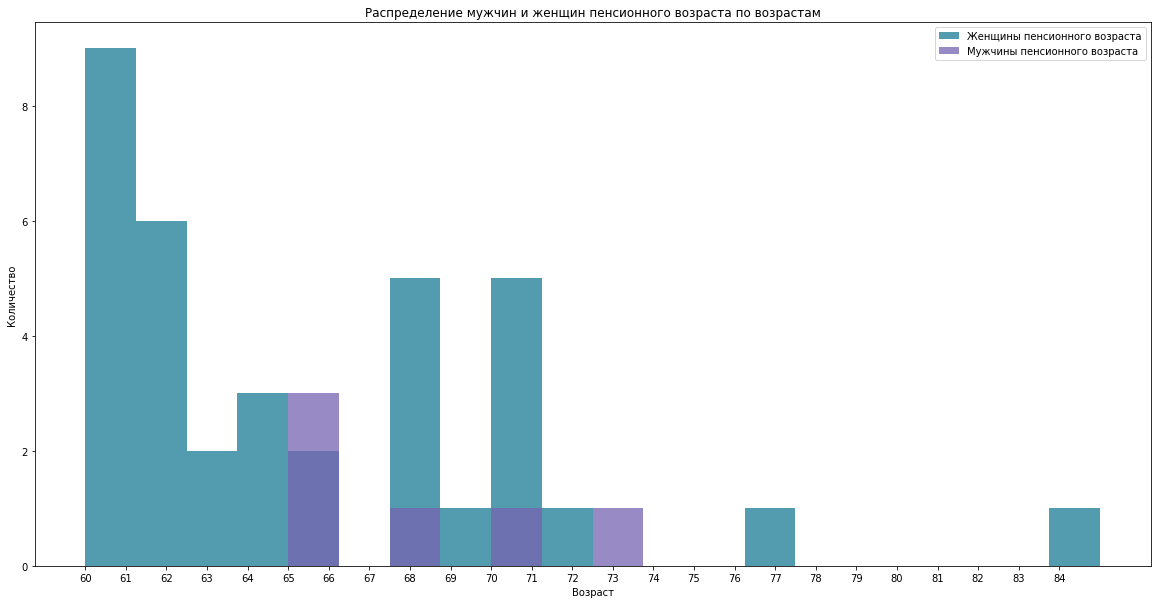

In [ ]:
# *в выборке
overlaid_histogram(data_silver[data_silver['gender'] == 'Женщина']['age'],
                   data_silver[data_silver['gender'] == 'Мужчина']['age'],
                   data1_name = 'Женщины пенсионного возраста',
                   data2_name = 'Мужчины пенсионного возраста',
                   x_label="Возраст",
                   y_label="Количество",
                   title="Распределение мужчин и женщин пенсионного возраста по возрастам"
                   )

In [ ]:
data_pre_silver['gender'].value_counts()

Женщина    52
Мужчина    14
Female      2
Name: gender, dtype: int64

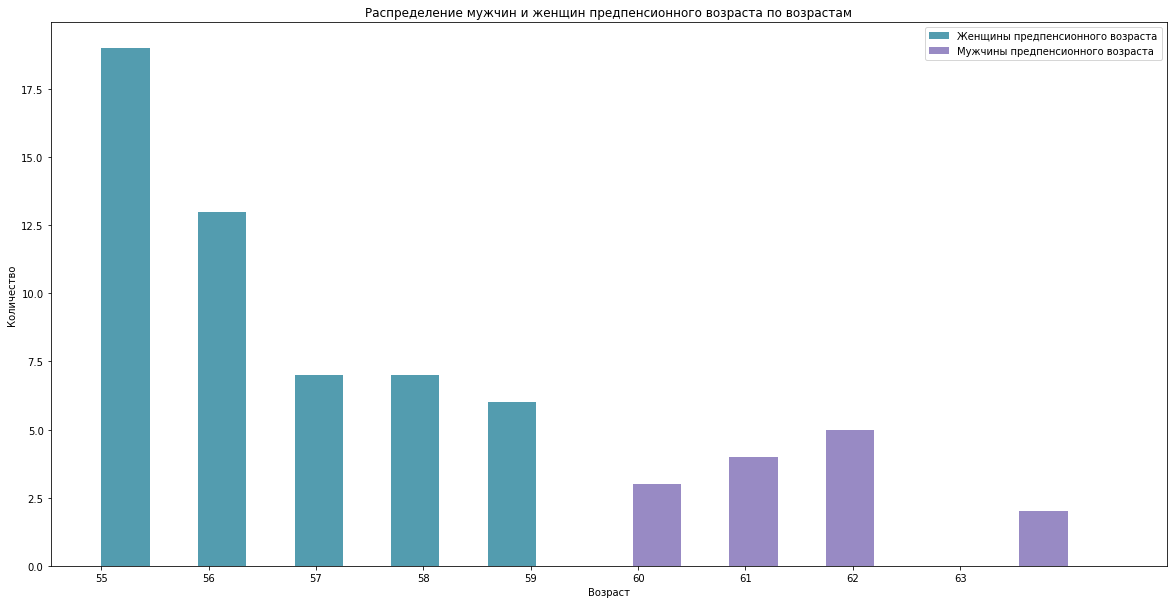

In [ ]:
overlaid_histogram(data_pre_silver[data_pre_silver['gender'] == 'Женщина']['age'],
                   data_pre_silver[data_pre_silver['gender'] == 'Мужчина']['age'],
                   data1_name = 'Женщины предпенсионного возраста',
                   data2_name = 'Мужчины предпенсионного возраста',
                   x_label="Возраст",
                   y_label="Количество",
                   title="Распределение мужчин и женщин предпенсионного возраста по возрастам"
                   )

In [ ]:
data_rest['gender'].value_counts()

Женщина    1216
Мужчина     496
Female       19
Male         14
Name: gender, dtype: int64

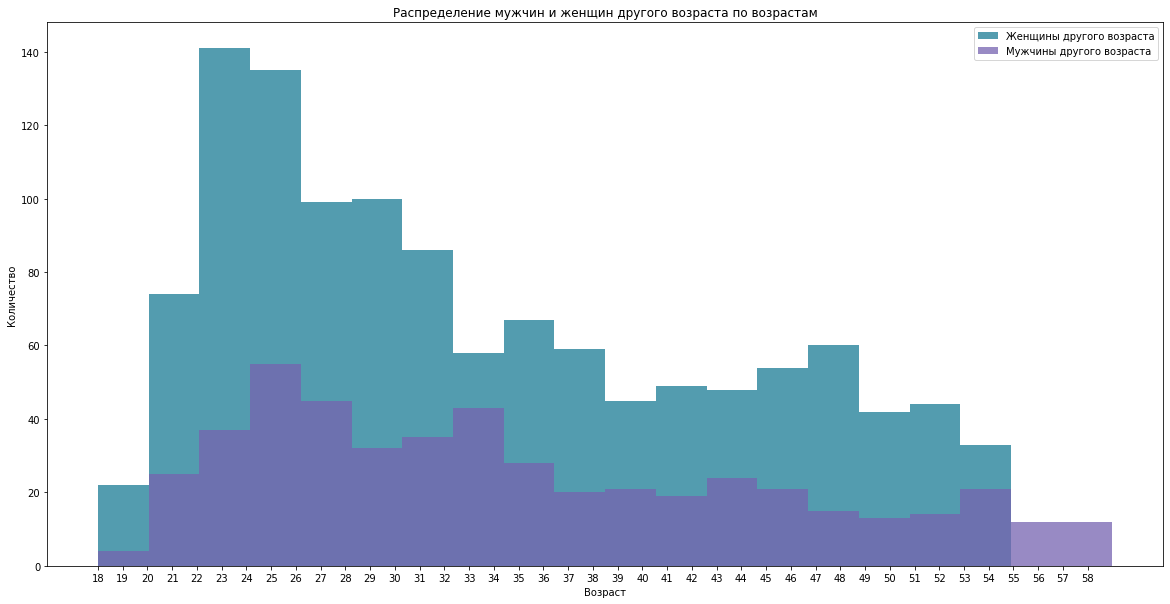

In [ ]:
# моложе 50
overlaid_histogram(data_rest[data_rest['gender'] == 'Женщина']['age'],
                   data_rest[data_rest['gender'] == 'Мужчина']['age'],
                   data1_name = 'Женщины другого возраста',
                   data2_name = 'Мужчины другого возраста',
                   x_label="Возраст",
                   y_label="Количество",
                   title="Распределение мужчин и женщин другого возраста по возрастам"
                   )

## Выявление безработных и трудоустроенных соискателей

In [ ]:
def last_experience(experience_list):
    if (experience_list != '[]'):
        last_experience_date = experience_list.replace('None', '').split(',')[1].strip()
    else:
        last_experience_date = ''
    return last_experience_date


def apply_empl_filter(df):
    return df.apply(
        lambda row:
          last_experience(row)
    )

In [ ]:
def calculate_gap(last_experience):
    last_experience = last_experience[1:11]

    date_month = int(last_experience.split('-')[1])
    date_year = int(last_experience.split('-')[2])
    date_day = int(last_experience.split('-')[0])

    date = datetime.datetime(date_year, date_month, date_day)
    now = datetime.datetime.now()
    gap = now - date
    return gap.days//365

def apply_calculate_gap(df):
    return df.apply(
        lambda row:
          calculate_gap(row)
    )

1. пенсионеры

In [ ]:
data_silver['last_experience'] = data_silver['experience']
data_silver['last_experience'] = apply_empl_filter(data_silver['last_experience'])
data_silver.head()

gender  ... last_experience
0  Женщина  ...                
1  Женщина  ...                
2  Мужчина  ...    '01-06-2019'
3  Женщина  ...    '01-04-1985'
4   Female  ...                

[5 rows x 7 columns]

In [ ]:
data_silver_unempl = data_silver[data_silver['last_experience'] != '']
data_silver_unempl.head()

gender  ... last_experience
2   Мужчина  ...    '01-06-2019'
3   Женщина  ...    '01-04-1985'
8   Женщина  ...    '01-12-2019'
9   Женщина  ...    '01-09-2020'
10  Мужчина  ...    '01-08-2021'

[5 rows x 7 columns]

In [ ]:
data_silver_unempl['gap'] = np.nan
data_silver_unempl['gap'] = apply_calculate_gap(data_silver_unempl['last_experience'])
data_silver_unempl.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


gender  ... gap
2   Мужчина  ...   2
3   Женщина  ...  36
8   Женщина  ...   1
9   Женщина  ...   1
10  Мужчина  ...   0

[5 rows x 8 columns]

Text(0.5, 1.0, 'Распределение по значению времени, прошедшего с окончания трудоустройства: пенсионеры')

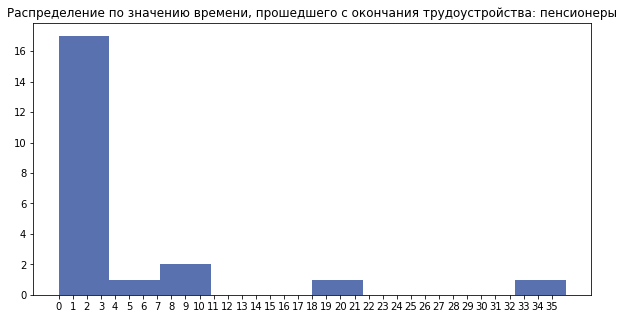

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(np.arange(data_silver_unempl['gap'].min(), data_silver_unempl['gap'].max(),1))
ax.hist(data_silver_unempl['gap'], color = '#5a71b0', alpha = 1)
ax.set_title('Распределение по значению времени, прошедшего с окончания трудоустройства: пенсионеры')

2. предпенсионеры

In [ ]:
data_pre_silver['last_experience'] = data_pre_silver['experience']
data_pre_silver['last_experience'] = apply_empl_filter(data_pre_silver['last_experience'])
data_pre_silver.head()

gender  ... last_experience
0  Мужчина  ...                
1  Мужчина  ...    '01-09-2020'
2  Женщина  ...                
3  Женщина  ...    '01-09-2017'
4  Женщина  ...                

[5 rows x 7 columns]

In [ ]:
data_pre_silver_unempl = data_pre_silver[data_pre_silver['last_experience'] != ""]
data_pre_silver_unempl['gap'] = np.nan
data_pre_silver_unempl['gap'] = apply_calculate_gap(data_pre_silver_unempl['last_experience'])
data_pre_silver_unempl.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


gender  ... gap
1  Мужчина  ...   1
3  Женщина  ...   4
7  Женщина  ...   1
8  Женщина  ...   0
9  Женщина  ...  23

[5 rows x 8 columns]

Text(0.5, 1.0, 'Распределение по значению времени, прошедшего с окончания трудоустройства: предпенсионеры')

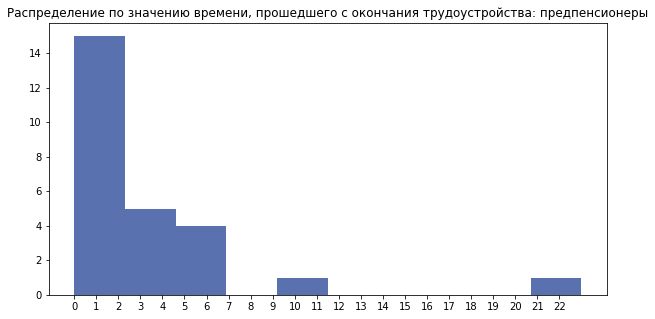

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(np.arange(data_pre_silver_unempl['gap'].min(), data_pre_silver_unempl['gap'].max(),1))
ax.hist(data_pre_silver_unempl['gap'], color = '#5a71b0', alpha = 1)
ax.set_title('Распределение по значению времени, прошедшего с окончания трудоустройства: предпенсионеры')

3. остальные

In [ ]:
data_rest.head()

gender  ... age
0  Женщина  ...  42
1  Мужчина  ...  23
2  Женщина  ...  22
3  Женщина  ...  53
4  Мужчина  ...  30

[5 rows x 6 columns]

In [ ]:
data_rest['last_experience'] = data_rest['experience']
data_rest['last_experience'] = apply_empl_filter(data_rest['last_experience'])
data_rest.head()

gender                                       title  ... age last_experience
0  Женщина    преподаватель по маркетингу, менеджменту  ...  42    '01-01-2021'
1  Мужчина                               Инженер-физик  ...  23    '01-10-2020'
2  Женщина                              Химик-аналитик  ...  22                
3  Женщина                               Преподаватель  ...  53                
4  Мужчина  Преподаватель физической культуры и спорта  ...  30                

[5 rows x 7 columns]

In [ ]:
data_rest_unempl = data_rest[data_rest['last_experience'] != ""]
data_rest_unempl['gap'] = np.nan
data_rest_unempl['gap'] = apply_calculate_gap(data_rest_unempl['last_experience'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Распределение по значению времени, прошедшего с окончания трудоустройства: другие возраста')

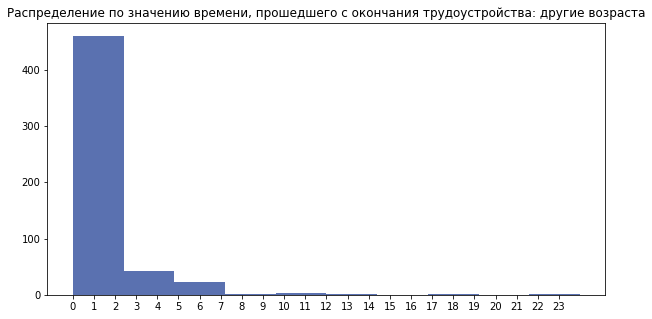

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(np.arange(data_rest_unempl['gap'].min(), data_rest_unempl['gap'].max(),1))
ax.hist(data_rest_unempl['gap'], color = '#5a71b0', alpha = 1)
ax.set_title('Распределение по значению времени, прошедшего с окончания трудоустройства: другие возраста')

# Гистограммы для объединенного датасета

In [ ]:
df_total = pd.concat([data_silver, data_pre_silver, data_rest], ignore_index=True)
df_total

gender  ... last_experience
0     Женщина  ...                
1     Женщина  ...                
2     Мужчина  ...    '01-06-2019'
3     Женщина  ...    '01-04-1985'
4      Female  ...                
...       ...  ...             ...
1851  Женщина  ...                
1852  Женщина  ...                
1853  Женщина  ...                
1854  Женщина  ...    '01-05-2021'
1855  Женщина  ...    '01-05-2021'

[1856 rows x 7 columns]

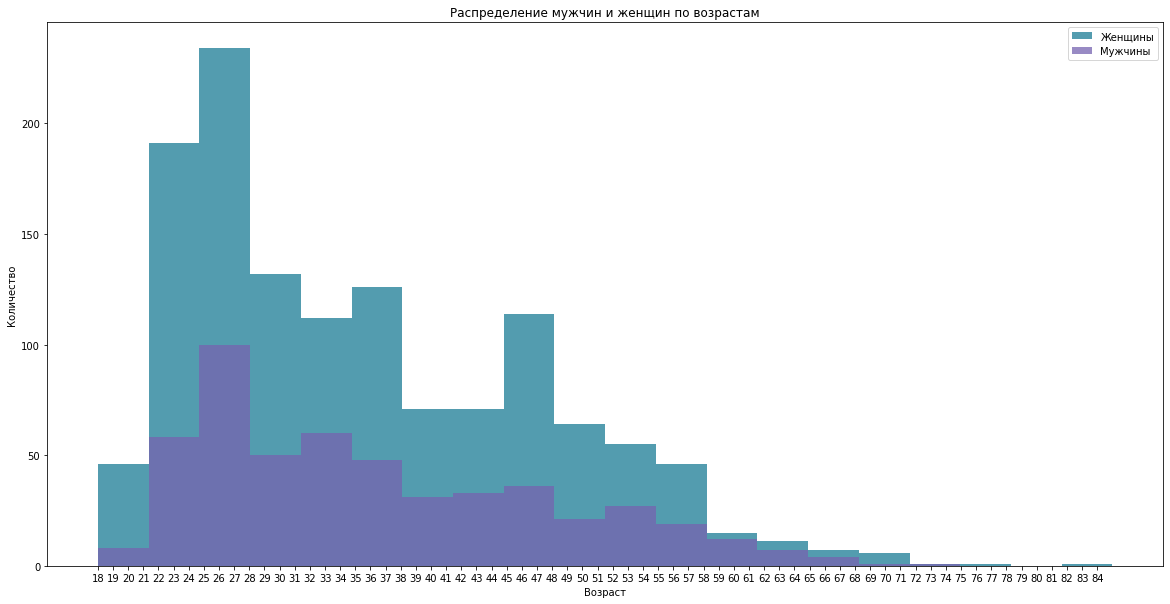

In [ ]:
overlaid_histogram(df_total[df_total['gender'] == 'Женщина']['age'],
                   df_total[df_total['gender'] == 'Мужчина']['age'],
                   data1_name = 'Женщины',
                   data2_name = 'Мужчины',
                   x_label="Возраст",
                   y_label="Количество",
                   title="Распределение мужчин и женщин по возрастам"
                   )

In [ ]:
len(df_total)

1856

In [ ]:
df_total['last_experience'] = df_total['experience']
df_total['last_experience'] = apply_empl_filter(df_total['last_experience'])

In [ ]:
df_total_unempl = df_total[df_total['last_experience'] != ""]
df_total_unempl['gap'] = np.nan
df_total_unempl['gap'] = apply_calculate_gap(df_total_unempl['last_experience'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Распределение по значению времени, прошедшего с окончания трудоустройства')

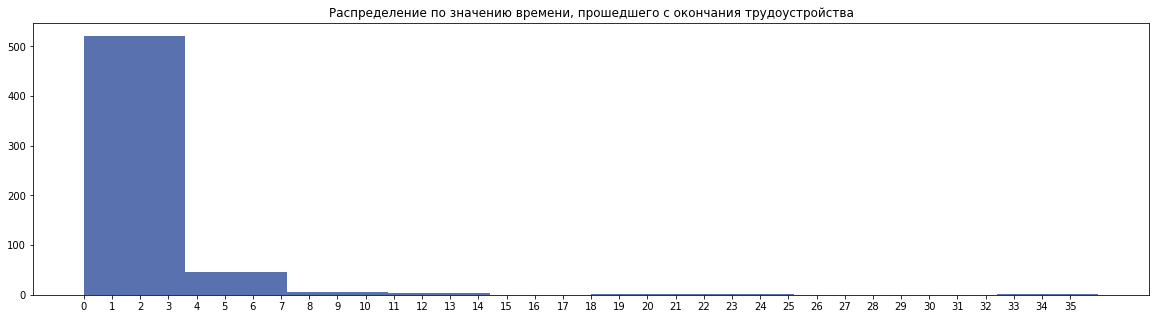

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(np.arange(df_total_unempl['gap'].min(), df_total_unempl['gap'].max(),1))
ax.hist(df_total_unempl['gap'], color = '#5a71b0', alpha = 1)
ax.set_title('Распределение по значению времени, прошедшего с окончания трудоустройства')

# Частотный анализ: облака слов

## Подготовка данных для частотного анализа: Названия

Соберем все названия в один документ:

In [ ]:
doc_vacancies_title = ''
for title in new_vacancies1['name']:
  doc_vacancies_title += title + ' '
doc_vacancies_title

'Assistant teacher / Помощник преподавателя BIM-инструктор Cпециалист отделения учебно-методической работы English Teacher English Teacher (Immediate start, Mytischy / Mытищи) English Teacher (Native Speaker)/Преподаватель английского языка English Teacher (Native speaker) English Teacher (bilingual) for kids 3-4 years old English Teacher at a Language Center/ Преподаватель английского языка в языковой центр English teacher English teacher (native speaker)  TPR method English teacher (native speaker) to bilingual kindergarten English tutor for a beginners\' course (adults) IT-специалист Librarian Native speaker - English language teacher Research Associate по научным исследованиям в США Spanish native speaking teacher Teacher Assistant / Второй педагог Teacher Assistant / Педагог (английский язык) Teacher Assistant/ Ассистент педагога-носителя языка Teacher of English Teacher of English/Преподаватель английского языка Web-программист/верстальщик Автоинструктор Автор книг/писатель (пишу

In [ ]:
doc_silver_title = ''
for title in data_silver['title']:
  doc_silver_title += title + ' '
doc_silver_title

'Учитель начальных классов преподаватель химии Организатор учебного процесса Преподаватель немецкого языка, Переводчик немецкого языка, Гувернантка, Няня Преподаватель Учитель начальных классов. Преподаватель Учитель английского языка или воспитатель  Преподаватель, репетитор, производство, лаборант, контролер Учитель английского и немецкого  языков Преподаватель инженерных дисциплин Специалист поддержки - помощник учитель информатики и ИКТ УЧИТЕЛЬ НАЧАЛЬНЫХ КЛАССОВ Преподаватель по робототехнике,  преподаватель по "Занимательной Астрономии" Психолог-педагог Учитель русского языка и литературы администратор- консультант Преподаватель изобразительного искусства Директор, за. директора, методист, специалист, администратор преподаватель, методист Старший преподаватель по ИТ-технологиям и системам Няня-воспитатель Репетитор по математическому анализу Репетитор информатики. Начала программирования Преподаватель английского языка, быстрая эффективная помощь для работы и учебы доцент, препода

In [ ]:
doc_presilver_title = ''
for title in data_pre_silver['title']:
  doc_presilver_title += title + ' '
doc_presilver_title

'главный специалист (образовательная деятельность, энергетика, энергосбережение) Начальник учебного заведения, заведующий учебной частью, преподаватель ПЕДАГОГ -ОРГАНИЗАТОР,, УЧИТЕЛЬ  МУ ЗЫКИ, вечерний администратор (выходного дня) Учитель начальных классов. . Администратор. преподаватель английского языка и лингвистики Руководитель школьной, студенческой видеостудии, театральной студии Преподаватель психологии Преподаватель преподаватель географии ( высшая категория), экологии, биологии, методист, завуч Нейропсихолог, Педагог по раннему развитию, подготовка к школе, дошкольное образование Методист учебного отдела, преподаватель математики Преподаватель музыки, Тренер-преподаватель шахмат, Концертмейстер хореографии Педагог-организатор, гувернантка, репетитор по музыке Методист Преподаватель по подготовке детей к школе и освоению программы начальной школы Репетитор Педагог-организатор, зам по ВР, социальный педагог, психолог. преподаватель теории в автошколе Преподаватель медицинских д

In [ ]:
doc_rest_title = ''
for title in data_rest['title']:
  doc_rest_title += title + ' '
doc_rest_title

'преподаватель по маркетингу, менеджменту Инженер-физик Химик-аналитик Преподаватель Преподаватель физической культуры и спорта Администратор  Преподаватель математики и информатики и программирования на Си или Паскале Педагог английского языка Профессор Преподаватель английского языка преподаватель английского языка Преподаватель Преподаватель Учитель английского языка Преподаватель английского языка Преподаватель истории Филолог Personal Assistant/Office-manager/Secretary/administrative coordinator/Assistant accountant Преподаватель физической культуры Преподаватель по охране труда, пожарной и промышленной безопасности Преподаватель английского языка копирайтер сценарист инструктор по физической культуре, безопасности жизнедеятельности, руководитель отдела образования Учитель начальных классов Преподаватель физической культуры  Преподаватель английского языка Учитель-дефектолог, воспитатель Учитель истории и обществознания Логопед Методист. Преподаватель ИЗО и спец дисциплин. Препода

## Подготовка данных для частотного анализа: Навыки

In [ ]:
doc_vacancies_skills = ''
for skill_set in new_vacancies1['key_skills']:
  for skill in skill_set:
    doc_vacancies_skills += skill + ' '
doc_vacancies_skills

'Autodesk Revit Проведение семинаров Обучение GetCourse Умение принимать решения Государственные закупки Заключение договоров Закупки Организация учебного процесса Английский язык Преподаватель Грамотная речь Организаторские навыки Английский язык Грамотность Работа в команде Английский язык Преподаватель Преподаватель Английский язык Грамотная речь Организация учебного процесса Организация мероприятий English Грамотная речь Английский язык Time management Writing Skills Ответственность и пунктуальность Знание компьютера Английский язык Грамотная речь MS PowerPoint English Fluent English Навыки делового общения Английский язык Internet Time management Communication skills Interpersonal skills Английский язык Internet Time management Communication skills Interpersonal skills Английский язык Internet Time management Communication skills Interpersonal skills Английский язык Детская психология Бумажный архив Пользователь ПК MS PowerPoint Английский язык Пользователь ПК Административная под

In [ ]:
doc_silver_skills = ''
for skill_set in data_silver['skill_set']:
  for skill in skill_set:
    doc_silver_skills += skill + ' '
doc_silver_skills

'Готова к нововведениям в образовательном процессе к использованию инновационных технологий развива Умение работать в команде Организация презентаций Навыки межличностного общения Возрастная психология Работа с базами данных Индивидуальное обучение Умение работать в коллективе Обучение Написание научных статей Преподаватель Научные исследования Научная деятельность Написание статей Аналитические исследования Грамотная речь  Устный перевод Синхронный перевод Последовательный перевод Письменный перевод Преподаватель Немецкий язык Ведение переписки на иностранном языке Перевод художественной литературы Редактирование текстов на иностранном языке Перевод договоров Перевод Технический перевод Детская психология Организаторские навыки Перевод технической документации Подготовка презентаций на иностранном языке Административная поддержка иностранного сотрудника Подготовка презентаций Художественный перевод Обучение Грамотная речь Перевод юридической документации Креативность Деловая коммуника

In [ ]:
doc_presilver_skills = ''
for skill_set in data_pre_silver['skill_set']:
  for skill in skill_set:
    doc_presilver_skills += skill + ' '
doc_presilver_skills

' Работоспособность умею работать как в коллективе так и индивидуально Стрессоустойчивость индивидуальный подход к каждому улаживать конфликты делегировать задачи контролировать выполнение задач определить приоритеты Организация мероприятий Творческое мышление Пользователь ПК Работа в команде Управление персоналом MS PowerPoint Обучение персонала Организаторские навыки Организация учебного процесса Грамотность Ведение отчетности Пользователь ПК Работа в команде Организация учебного процесса Ответственность. Исполнительность. Подготовка презентаций на иностранном языке Преподаватель Подготовка презентаций на иностранном языке преподавание английского языка по различным методикам, Редактирование текстов на иностранном языке Английский язык Письменный перевод Перевод MS PowerPoint Ведение переписки на иностранном языке Перевод технической документации Деловая коммуникация Пользователь ПК Обучение Skype Написание научных статей Организация учебного процесса Технический перевод Администрати

In [ ]:
doc_rest_skills = ''
for skill_set in data_rest['skill_set']:
  for skill in skill_set:
    doc_rest_skills += skill + ' '
doc_rest_skills

'Адаптация трейд-маркетинговой стратегии Стратегический маркетинг Бренд-менеджмент преподавание Продвижение бренда Бюджетирование Маркетинговый анализ Планирование маркетинговых кампаний Управление персоналом Конференции Участие в профессиональных выставках работа с молодежью поиск талантов проектная деятельность работа с вузами работа с образовательными учреждениями Управление командой Разработка маркетинговой стратегии Wolfram Matematica2 MATLAB2 Python2 MS Office2 Linux2 Windows Os Origin Scidavis Internet Спектрометрия1 Вакуумная техника1 Электрические системы и слаботочные системы1 Документальное сопровождение1 Лабораторная работа1 Преподаватель1 SolidWorks AutoCAD Спектрофотометрия Анализ объектов окружающей среды Титриметрический анализ (титрование) Организаторские навыки Профессионализм коммуникативные навыки Пользователь ПК Ведение переговоров Деловая переписка Деловое общение Заключение договоров Управление проектами Телефонные переговоры Грамотная речь Работа в команде Управ

## Предобработка

Делаем с текстом следующее:

- приводим к нижнему регистру;
- удаляем стоп-слова;
- удаляем знаки препинания и прочие символы;
- производим лемматиацию - приведение слов к начальным формам

In [ ]:
!pip install pymorphy2
!pip install --user -U nltk

import pymorphy2
import nltk
import re
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
morph = pymorphy2.MorphAnalyzer()

stopwords = set(stopwords.words('russian'))
custom_stopwords = ['работа', 'работать', 'учиться', 'образование','развитие','обучение', 'дети', 'ребёнок', 'умение', 'навык', 'владеть', 'знание', 'способность', 'преподаватель']  # дополним список стоп-слов
stopwords.update(custom_stopwords)

def lemmatize(song):
    doc = song.split()
    tokens = ""
    for i in range(len(doc)):
        token = morph.normal_forms(doc[i])[0]
        tokens = tokens + token + " "
    return(tokens)

def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower().split()
    text = [word for word in text if word not in stopwords]
    text = ' '.join(text)
    text = lemmatize(text)
    return text

### Предобработка для названий

Обработаем документы с названиями специальностей

In [ ]:
cl_doc_vacancies_title = preprocess(doc_vacancies_title)
cl_doc_vacancies_title

'assistant teacher помощник преподаватель bimинструктор cпециалиста отделение учебнометодический работа english teacher english teacher immediate start mytischy mытискать english teacher native speakerпреподаватель английский язык english teacher native speaker english teacher bilingual for kids 34 years old english teacher at a language center английский язык языковой центр english teacher english teacher native speaker tpr method english teacher native speaker to bilingual kindergarten english tutor for a beginners course adults itспециалист librarian native speaker english language teacher research associate научный исследование сша spanish native speaking teacher teacher assistant второй педагог teacher assistant педагог английский язык teacher assistant ассистент педагоганоситель язык teacher of english teacher of englishпреподаватель английский язык webпрограммистверстальщик автоинструктор автор книгписатель пишущий редактор автор работа рерайтинг повышение оригинальность автор с

In [ ]:
cl_doc_silver_title = preprocess(doc_silver_title)
cl_doc_silver_title

'учитель начальный класс химия организатор учебный процесс немецкий язык переводчик немецкий язык гувернантка няня учитель начальный класс учитель английский язык воспитатель репетитор производство лаборант контролёр учитель английский немецкий язык инженерный дисциплина специалист поддержка помощник учитель информатика икт учитель начальный класс робототехника занимательный астрономия психологпедагог учитель русский язык литература администратор консультант изобразительный искусство директор директор методист специалист администратор методист старший иттехнология система нянявоспитатель репетитор математический анализ репетитор информатика начало программирование английский язык быстрый эффективный помощь работа учёба доцент физика математика доцент учитель технология французский немецкий язык переводчик репетитор психолог учитель математика учитель физика воспитатель педагог репетитор русский язык литература учитель русский язык литература высокий категория доцент вуз математика репе

In [ ]:
cl_doc_presilver_title = preprocess(doc_presilver_title)
cl_doc_presilver_title

'главный специалист образовательный деятельность энергетика энергосбережение начальник учебный заведение заведовать учебный часть педагог организатор учитель му зык вечерний администратор выходной день учитель начальный класс администратор английский язык лингвистика руководитель школьный студенческий видеостудия театральный студия психология география высокий категория экология биология методист завуч нейропсихолог педагог ранний развитие подготовка школа дошкольный методист учебный отдел математика музыка тренерпреподаватель шахматы концертмейстер хореография педагогорганизатор гувернантка репетитор музыка методист подготовка ребёнок школа освоение программа начальный школа репетитор педагогорганизатор зам вр социальный педагог психолог теория автошкола медицинский дисциплина учитель информатика французский язык английский язык огэ егэ ielts toefl редакторкорректоркопирайтеррепетитор русский язык больший опыт логопеддефектолог учитель начальный класс администратор музыкальный руковод

In [ ]:
cl_doc_rest_title = preprocess(doc_rest_title)
cl_doc_rest_title

'маркетинг менеджмент инженерфизика химиканалитик физический культура спорт администратор математика информатика программирование си паскаль педагог английский язык профессор английский язык английский язык учитель английский язык английский язык история филолог personal assistantofficemanagersecretaryadministrative coordinatorassistant accountant физический культура охрана труд пожарный промышленный безопасность английский язык копирайтер сценарист инструктор физический культура безопасность жизнедеятельность руководитель отдел образование учитель начальный класс физический культура английский язык учительдефектолог воспитатель учитель история обществознание логопед методист из спец дисциплина учитель музыка класс домра заместитель директор учебновоспитательный работа учитель начальный класс педагог дополнительный образование социальный педагог наставник экстернат домашний школа английский язык онлайн школа учитель физический культура история обществознание право юрист вокал дирижёрхо

### Предобработка для навыков

In [ ]:
cl_doc_vacancies_skills = preprocess(doc_vacancies_skills)
cl_doc_vacancies_skills

'autodesk revit проведение семинар getcourse принимать решение государственный закупка заключение договор закупка организация учебный процесс английский язык грамотный речь организаторский навык английский язык грамотность команда английский язык английский язык грамотный речь организация учебный процесс организация мероприятие english грамотный речь английский язык time management writing skills ответственность пунктуальность компьютер английский язык грамотный речь ms powerpoint english fluent english навык деловой общение английский язык internet time management communication skills interpersonal skills английский язык internet time management communication skills interpersonal skills английский язык internet time management communication skills interpersonal skills английский язык детский психология бумажный архив пользователь пк ms powerpoint английский язык пользователь пк административный поддержка руководитель skype английский язык подготовка презентация написание научный стать

In [ ]:
cl_doc_silver_skills = preprocess(doc_silver_skills)
cl_doc_silver_skills

'готовый нововведение образовательный процесс использование инновационный технология развив команда организация презентация навык межличностный общение возрастной психология база данные индивидуальный коллектив написание научный стать научный исследование научный деятельность написание стать аналитический исследование грамотный речь устный перевод синхронный перевод последовательный перевод письменный перевод немецкий язык ведение переписка иностранный язык перевод художественный литература редактирование текст иностранный язык перевод договор перевод технический перевод детский психология организаторский навык перевод технический документация подготовка презентация иностранный язык административный поддержка иностранный сотрудник подготовка презентация художественный перевод грамотный речь перевод юридический документация креативность деловой коммуникация навык межличностный общение ведение переговоры грамотность деловой переписка общий психология компьютер интерактивный доска исполни

In [ ]:
cl_doc_presilver_skills = preprocess(doc_presilver_skills)
cl_doc_presilver_skills

'работоспособность уметь коллектив индивидуально стрессоустойчивость индивидуальный подход каждый улаживать конфликт делегировать задача контролировать выполнение задача определить приоритет организация мероприятие творческий мышление пользователь пк команда управление персонал ms powerpoint персонал организаторский навык организация учебный процесс грамотность ведение отчётность пользователь пк команда организация учебный процесс ответственность исполнительность подготовка презентация иностранный язык подготовка презентация иностранный язык преподавание английский язык различный методика редактирование текст иностранный язык английский язык письменный перевод перевод ms powerpoint ведение переписка иностранный язык перевод технический документация деловой коммуникация пользователь пк skype написание научный стать организация учебный процесс технический перевод административный поддержка иностранный сотрудник человек деловой переписка команда управление проект грамотный речь иностранны

In [ ]:
cl_doc_rest_skills = preprocess(doc_rest_skills)
cl_doc_rest_skills

'адаптация трейдмаркетинговый стратегия стратегический маркетинг брендменеджмент преподавание продвижение бренд бюджетирование маркетинговый анализ планирование маркетинговый кампания управление персонал конференция участие профессиональный выставка молодёжь поиск талант проектный деятельность вуз образовательный учреждение управление команда разработка маркетинговый стратегия wolfram matematica2 matlab2 python2 ms office2 linux2 windows os origin scidavis internet спектрометрия1 вакуумный техника1 электрический система слаботочный системы1 документальный сопровождение1 лабораторный работа1 преподаватель1 solidworks autocad спектрофотометрия анализ объект окружающий среда титриметрический анализ титрование организаторский навык профессионализм коммуникативный навык пользователь пк ведение переговоры деловой переписка деловой общение заключение договор управление проект телефонный переговоры грамотный речь команда управление персонал персонал ms powerpoint проведение презентация навык п

## Облака слов

In [ ]:
# Импортируем библиотеку для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

# Функция для визуализации облака слов
def plot_cloud(wordcloud, cloudname):
    # Устанавливаем размер картинки
    plt.figure(figsize=(12, 10))
    # Показать изображение
    plt.imshow(wordcloud) 
    # Без подписей на осях
    plt.axis("off")
    plt.title(cloudname)

In [ ]:
# Импортируем инструменты для облака слов и списки стоп-слов
from wordcloud import WordCloud

def create_cloud(text, filename, cloudname):
  wordcloud = WordCloud(width = 1300, 
                      height = 700, 
                      random_state=1, 
                      background_color='white', 
                      margin=20, 
                      colormap='viridis', 
                      stopwords = stopwords,
                      collocations=False).generate(text)
  plot_cloud(wordcloud, cloudname)
  wordcloud.to_file(filename)

### Облака слов для названий специальностей

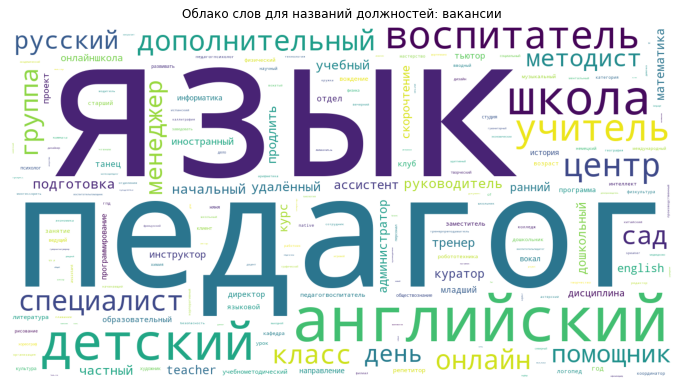

In [ ]:
create_cloud(cl_doc_vacancies_title, 'vacancies_title_cloud.png', 'Облако слов для названий должностей: вакансии')

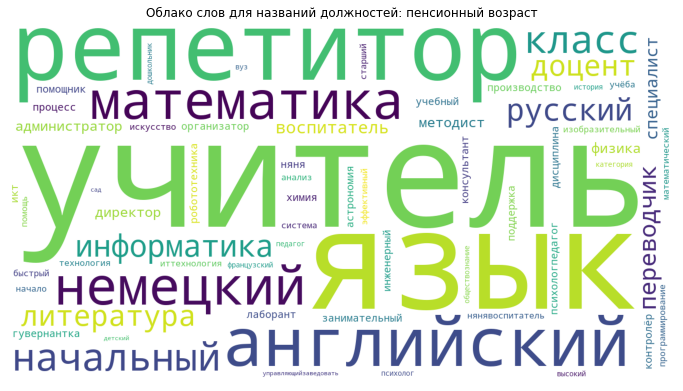

In [ ]:
create_cloud(cl_doc_silver_title, 'silver_title_cloud.png', 'Облако слов для названий должностей: пенсионный возраст')

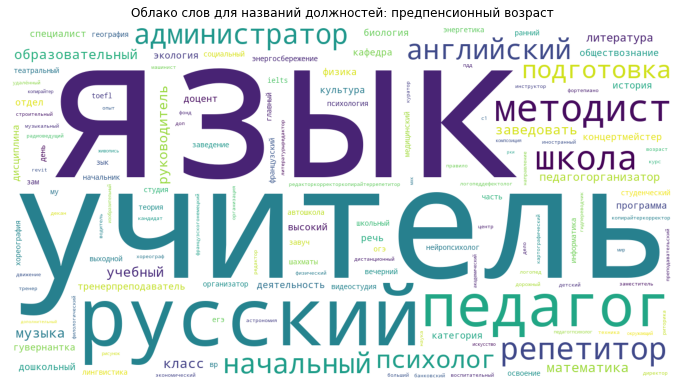

In [ ]:
create_cloud(cl_doc_presilver_title, 'presilver_title_cloud.png', 'Облако слов для названий должностей: предпенсионный возраст')

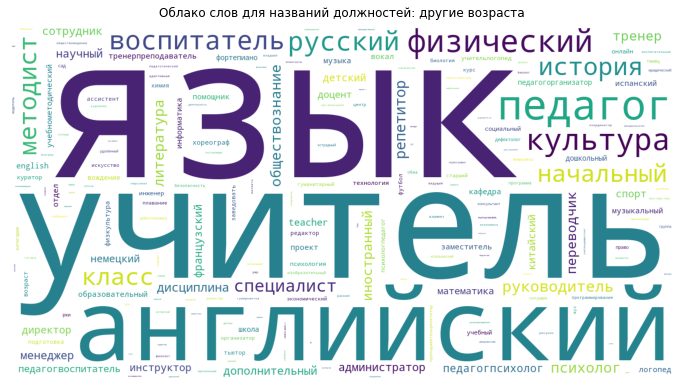

In [ ]:
create_cloud(cl_doc_rest_title, 'rest_title_cloud.png', 'Облако слов для названий должностей: другие возраста')

### Облака слов для навыков

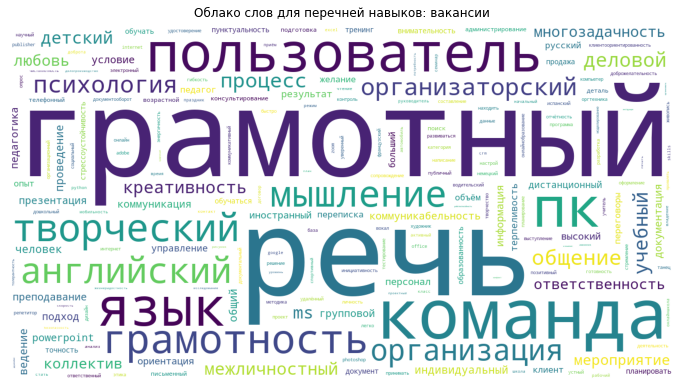

In [ ]:
create_cloud(cl_doc_vacancies_skills, 'vacancies_skills_cloud.png', 'Облако слов для перечней навыков: вакансии')

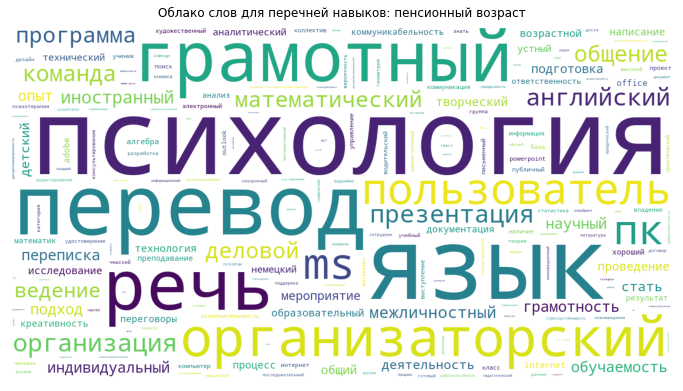

In [ ]:
create_cloud(cl_doc_silver_skills, 'silver_skills_cloud.png', 'Облако слов для перечней навыков: пенсионный возраст')

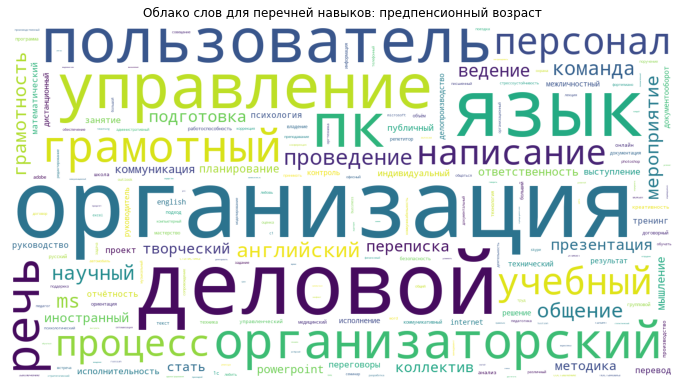

In [ ]:
create_cloud(cl_doc_presilver_skills, 'presilver_skills_cloud.png', 'Облако слов для перечней навыков: предпенсионный возраст')

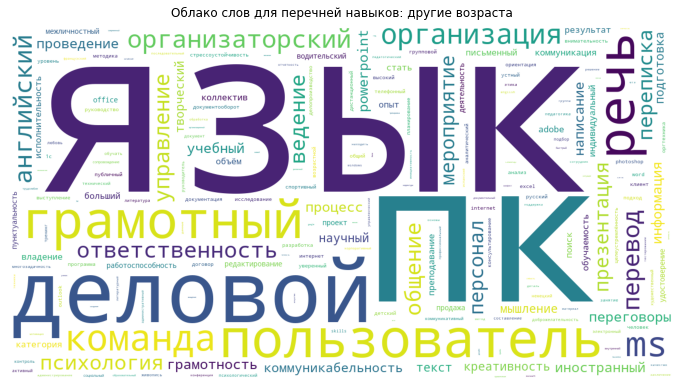

In [ ]:
create_cloud(cl_doc_rest_skills, 'rest_skills_cloud.png', 'Облако слов для перечней навыков: другие возраста')